# Задачи
* 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
* 3.Рассчитать и визуализировать корреляционную матрицу для переменных.
* 4.Визуализировать несколько взаимосвязей между переменными.
* 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
* 6.Рассчитать сколько работников работает в каждом департаменте.
* 7.Показать распределение сотрудников по зарплатам.
* 8.Показать распределение сотрудников по зарплатам совместно с департаментами.
* 9.Сколько сотрудников покинули компанию.
* 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('HR.csv')
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


 * Через функцию describe() вычислим min,max,среднее(mean), отклонение(std)

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


* Построим матрицу корреляций

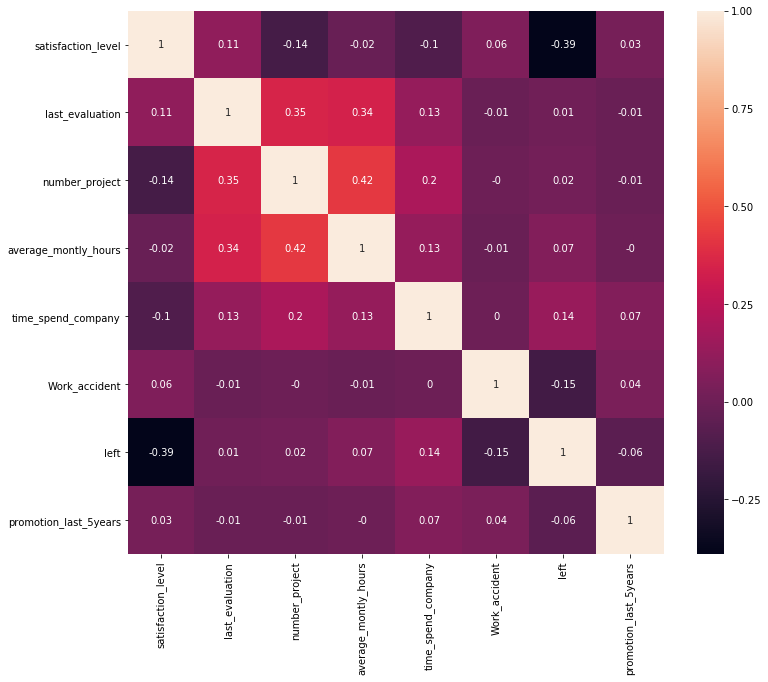

In [8]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

## По матрице корреляции видим, что существует корреляция между метриками: 
* satisfaction_level - left
* last_evaluation - average_montly_hours
* last_evaluation - number_project
* number_project - average_montly_hours

* Все остольные показатели корреляции не существенны

In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
t_data = data[['satisfaction_level','left','last_evaluation','average_montly_hours','number_project',]]

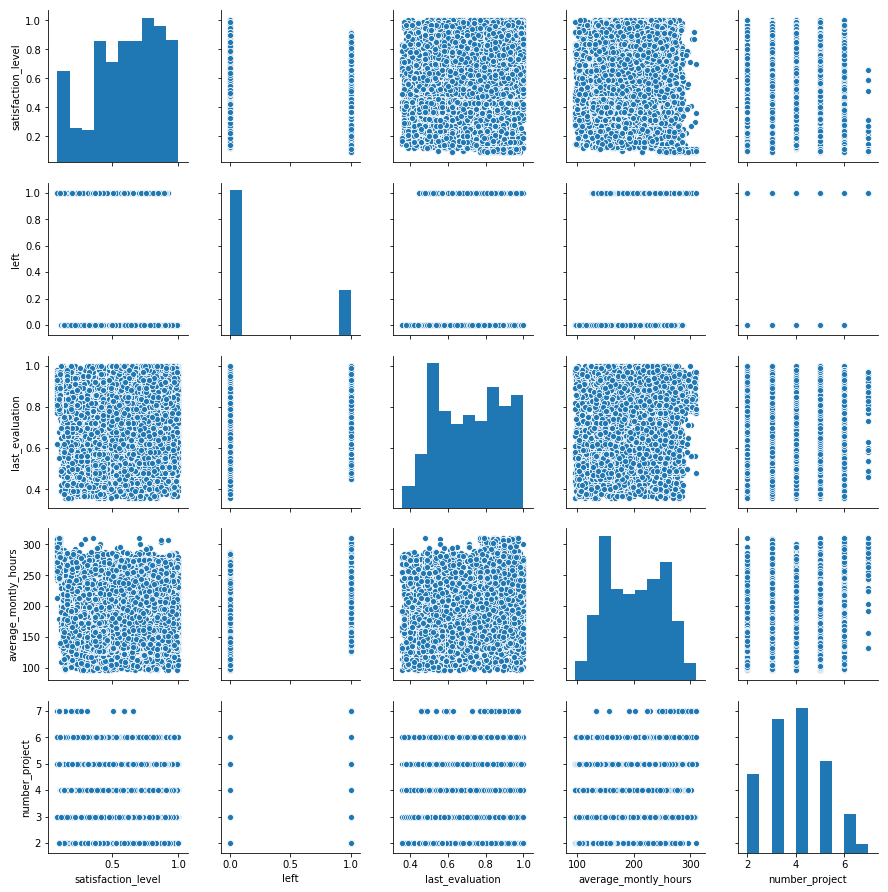

In [11]:
sns.pairplot(t_data)

* Рассчитаем корреляцию Пирсона 

In [12]:
from scipy.stats import pearsonr
pearsonr(t_data['satisfaction_level'], t_data['left'])

(-0.3883749834241141, 0.0)

In [13]:
from scipy.stats import pearsonr
pearsonr(t_data['last_evaluation'], t_data['average_montly_hours'])

(0.33974179983835906, 0.0)

In [14]:
from scipy.stats import pearsonr
pearsonr(t_data['last_evaluation'], t_data['number_project'])

(0.3493325885162623, 0.0)

In [15]:
from scipy.stats import pearsonr
pearsonr(t_data['number_project'], t_data['average_montly_hours'])

(0.417210634401777, 0.0)

## С использованием t-test статистики проверим взаимосвязи между несколькими переменными.
* satisfaction_level - left
* last_evaluation - average_montly_hours
* last_evaluation - number_project
* number_project - average_montly_hours


In [16]:
from scipy import stats
stats.ttest_ind(t_data['satisfaction_level'], t_data['left'])

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)

* p-value = 0, намного меньше 0.05 и мы отвергаем нулевую гепотизу H0, и делаем вывод, что satisfaction_level <> left

In [17]:
from scipy import stats
stats.ttest_ind(t_data['last_evaluation'], t_data['average_montly_hours'])

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)

* p-value = 0, намного меньше 0.05 и мы отвергаем нулевую гепотизу H0, и делаем вывод, что slast_evaluation <> average_montly_hours

In [18]:
from scipy import stats
stats.ttest_ind(t_data['last_evaluation'], t_data['number_project'])

Ttest_indResult(statistic=-303.8042100031241, pvalue=0.0)

* p-value = 0, намного меньше 0.05 и мы отвергаем нулевую гепотизу H0, и делаем вывод, что last_evaluation <> number_project

In [19]:
from scipy import stats
stats.ttest_ind(t_data['number_project'], t_data['average_montly_hours'])

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)

* p-value = 0, намного меньше 0.05 и мы отвергаем нулевую гепотизу H0, и делаем вывод, что number_project <> average_montly_hours

## Показать распределение сотрудников по уровню зарплаты

In [20]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
data['salary'].describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [22]:
def one(a):
    return 1

In [23]:
test_data = data[['salary']] 

test_data.head()

,salary
0,low
1,medium
2,medium
3,low
4,low


In [24]:
test_data['count'] = test_data['salary'].apply(one)

C:\Users\Alexandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
test_data.head(10)

,salary,count
0,low,1
1,medium,1
2,medium,1
3,low,1
4,low,1
5,low,1
6,low,1
7,low,1
8,low,1
9,low,1


In [26]:
low = test_data[test_data['salary'] == 'low']['count']
medium = test_data[test_data['salary'] == 'medium']['count']
high =  test_data[test_data['salary'] == 'high']['count']


C:\Users\Alexandr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Alexandr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alexandr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Alexandr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


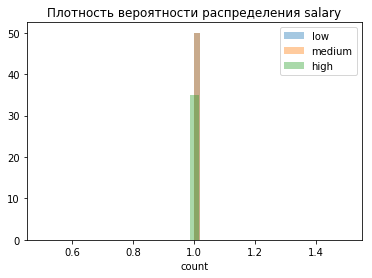

In [27]:
sns.distplot(low)
sns.distplot(medium)
sns.distplot(high)
plt.title('Плотность вероятности распределения salary')
plt.legend(['low', 'medium', 'high'])
plt.show()

## 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [28]:
data['sales'].describe()

count     14999
unique       10
top       sales
freq       4140
Name: sales, dtype: object

In [29]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [30]:
test1_data = data[['salary','sales']]

In [31]:
test1_data.head()

,salary,sales
0,low,sales
1,medium,sales
2,medium,sales
3,low,sales
4,low,sales


In [32]:
test1_data['count'] = test1_data['sales'].apply(one)

C:\Users\Alexandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
test1_data.head()

,salary,sales,count
0,low,sales,1
1,medium,sales,1
2,medium,sales,1
3,low,sales,1
4,low,sales,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001668532ECC0>]],
      dtype=object)

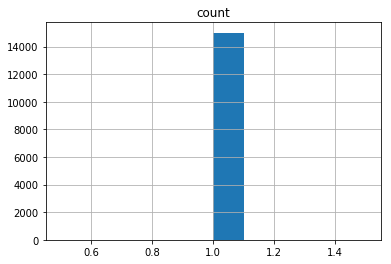

In [34]:
test1_data.hist()

## 9.Сколько сотрудников покинули компанию.

In [35]:
left_sum = data['left'].sum()

In [36]:
print(left_sum)

3571


* За все время компанию покинуло 3571 сотрудников

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.


### 1) Первая гипотеза о том почему сотрудники покидают компанию - малая заработная плата.
### 2) Вторая гипотеза о том почему сотрудники покидают компанию - не было повышения за 5 лет.

In [76]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [70]:
buf_salary_low = 0
buf_left = 0
for i in range(len(data['salary'])):
    if data['salary'][i] == 'low':
        buf_salary_low += 1
        if data['left'][i] == 1:
            buf_left += 1
print(f'Количество сотрудников с низкой зарплатой = {buf_salary_low} человек, из этих сотрудников ушло из компании {buf_left}')

procent_buf_salary_buf_left = (buf_left / buf_salary_low) * 100
print(f'В процентном соотношении сотрудников, которые уволились с работы к общему количеству сотрудников с низкой зарплатой = {round(procent_buf_salary_buf_left)} %')

#low = test_data[test_data['salary'] == 'low']['count']

Количество сотрудников с низкой зарплатой = 7316 человек, из этих сотрудников ушло из компании 2172
В процентном соотношении сотрудников, которые уволились с работы к общему количеству сотрудников с низкой зарплатой = 30 %


In [77]:
buf_salary_medium = 0
buf_left = 0
for i in range(len(data['salary'])):
    if data['salary'][i] == 'medium':
        buf_salary_medium += 1
        if data['left'][i] == 1:
            buf_left += 1
print(f'Количество сотрудников со средней зарплатой = {buf_salary_medium} человек, из этих сотрудников ушло из компании {buf_left}')

procent_buf_salary_buf_left = (buf_left / buf_salary_medium) * 100
print(f'В процентном соотношении сотрудников, которые уволились с работы к общему количеству сотрудников со средней зарплатой = {round(procent_buf_salary_buf_left)} %')


Количество сотрудников со средней зарплатой = 6446 человек, из этих сотрудников ушло из компании 1317
В процентном соотношении сотрудников, которые уволились с работы к общему количеству сотрудников со средней зарплатой = 20 %


In [78]:
buf_salary_high = 0
buf_left = 0
for i in range(len(data['salary'])):
    if data['salary'][i] == 'high':
        buf_salary_high += 1
        if data['left'][i] == 1:
            buf_left += 1
print(f'Количество сотрудников с высокой зарплатой = {buf_salary_high} человек, из этих сотрудников ушло из компании {buf_left}')

procent_buf_salary_buf_left = (buf_left / buf_salary_medium) * 100
print(f'В процентном соотношении сотрудников, которые уволились с работы к общему количеству сотрудников с высокой зарплатой = {round(procent_buf_salary_buf_left)} %')

Количество сотрудников с высокой зарплатой = 1237 человек, из этих сотрудников ушло из компании 82
В процентном соотношении сотрудников, которые уволились с работы к общему количеству сотрудников с высокой зарплатой = 1 %


### Как видно из результатов, то чем ниже заработная плата,тем большее количество увольнений - текучки

In [84]:
data_hipot = data[['left','promotion_last_5years']]
data_hipot.head()

,left,promotion_last_5years
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [86]:
buf_promotion_last_5years = 0
buf_left = 0
for i in range(len(data_hipot['left'])):
    if data['promotion_last_5years'][i] == 1:
        buf_promotion_last_5years += 1
        if data['left'][i] == 1:
            buf_left += 1
print(f'Количество сотрудников, которых повысили за 5 лет = {buf_promotion_last_5years} человек, из этих сотрудников ушло из компании {buf_left}')

procent_buf_salary_buf_left = (buf_left / buf_promotion_last_5years) * 100
print(f'В процентном соотношении сотрудники, которых повысили к количеству сотрудников покинувших компанию = {round(procent_buf_salary_buf_left)} %')

Количество сотрудников, которых повысили за 5 лет = 319 человек, из этих сотрудников ушло из компании 19
В процентном соотношении сотрудники, которых повысили к количеству сотрудников покинувших компанию = 6 %


In [87]:
buf_promotion_last_5years = 0
buf_left = 0
for i in range(len(data_hipot['left'])):
    if data['promotion_last_5years'][i] == 0:
        buf_promotion_last_5years += 1
        if data['left'][i] == 1:
            buf_left += 1
print(f'Количество сотрудников, которых не повысили за 5 лет = {buf_promotion_last_5years} человек, из этих сотрудников ушло из компании {buf_left}')

procent_buf_salary_buf_left = (buf_left / buf_promotion_last_5years) * 100
print(f'В процентном соотношении сотрудники, которых не повысили к количеству сотрудников покинувших компанию = {round(procent_buf_salary_buf_left)} %')

Количество сотрудников, которых не повысили за 5 лет = 14680 человек, из этих сотрудников ушло из компании 3552
В процентном соотношении сотрудники, которых не повысили к количеству сотрудников покинувших компанию = 24 %


### Как видно из результатов, если сотрудников не повышают в течении 5 лет, количество уволившихся в разы больше, по сравнению с сотрудниками которых повысили в течении 5 лет.